In [1]:
## Association
  # How to analyze data for a correlation, b/c it is simplest way to make an association claim, 
    # but the correct analysis depends on your data (continuous, discrete, normal vs non-normal, etc.).
    
# 3 measures of customer loyaty (loyalty1, loyalty2, loyalty3)

# Import/load packages to be used
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as ss
import math

# Also be using ggplot2 package for visualization and psych package for correlation testing.

## use inline command magic command so plots appear in data frame
%matplotlib inline 

In [2]:
# Import dataset to be used as Pandas data frame

data = pd.read_csv("datasets/loyaltydata.csv")

In [3]:
print(data.columns)

data.head()

Index(['Unnamed: 0', 'loyalty1', 'loyalty2', 'loyalty3'], dtype='object')


,Unnamed: 0,loyalty1,loyalty2,loyalty3
0,1,9,10,4
1,2,10,11,5
2,3,10,10,5
3,4,9,10,5
4,5,8,11,4


In [4]:
# Above - There is an ID variable shown as 'Unnamed' & scores on loyalty measures named 'loyalty1' - 'loyalty3'

# Below - Explore the variables w/ Pandas describe method.

data.describe()

,Unnamed: 0,loyalty1,loyalty2,loyalty3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,9.960000,10.449000,5.072000
std,288.819436,1.043786,1.332357,1.045901
min,1.000000,7.000000,7.000000,2.000000
25%,250.750000,9.000000,10.000000,4.000000
50%,500.500000,10.000000,10.000000,5.000000
75%,750.250000,11.000000,11.000000,6.000000
max,1000.000000,13.000000,16.000000,8.000000


In [5]:
# Above - Provides a sense of the range & scaling of each loyalty variable.

# Below - Can check for correlations b/w variables w/ Pandas corr method
 # A subset of data frame is taken (using outer [] operator), by providing a list (inner []) of column names.
    
data[['loyalty1', 'loyalty2', 'loyalty3']].corr()

,loyalty1,loyalty2,loyalty3
loyalty1,1.000000,0.395853,0.498695
loyalty2,0.395853,1.000000,0.573709
loyalty3,0.498695,0.573709,1.000000


In [6]:
# Let's use Pandas round method for easier reading.

corr_mat = data[['loyalty1', 'loyalty2', 'loyalty3']].corr().round(2)
corr_mat

,loyalty1,loyalty2,loyalty3
loyalty1,1.0,0.40,0.50
loyalty2,0.4,1.00,0.57
loyalty3,0.5,0.57,1.00


(array([0.5, 1.5, 2.5]), <a list of 3 Text xticklabel objects>)

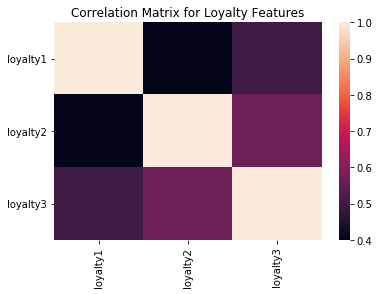

In [7]:
# Above - We see that variables are NOT highly correlated w/ each other. This is a potential problem.
 # Refresher - Correlations range b/w 0 (no association b/w variables) & 1.0 (1 to 1 association).
 #             Positive (as 1 variable increases, so does the other) or negative (as 1 variable increases, the other decreases).
 # Guideline from statistician Jacob Cohen
 #   | # | Correlation |  Meaning   |
 #   |---|-------------|------------|
 #   | 1 |  0.0 - 0.1  | Negligible |
 #   | 2 |  0.1 - 0.3  |   Small    |
 #   | 3 |  0.3 - 0.5  |   Medium   |
 #   | 4 |    0.5 +    |   Large    |
 # However, given that they are seemingly measuring the same thing, loyalty, we should expect much higher correlations (.7-.9).

# Visualize this correlation using Seaborne package heatmap function.

sns. heatmap(corr_mat, vmax = 1.0)
plt.title('Correlation Matrix for Loyalty Features')
plt.yticks(rotation = 'horizontal')
plt.xticks(rotation = 'vertical')

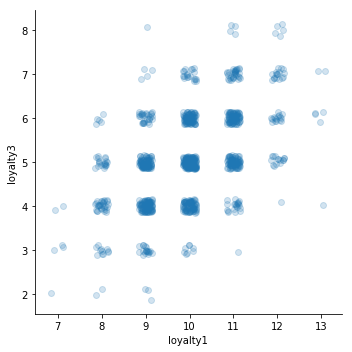

In [8]:
# Next, creat scatter plots of each pairwise combination of loyalty variables using lmplot function from Seaborne.
 # Jitter on both x & y axes along with high point transparancy are used to help w/ over-plotting.
  # Notice that transparency argument, alpha, must be passed to underling Matplotlib in a dictonary called scatter_kws.

sns.lmplot('loyalty1', 'loyalty3', data, x_jitter = 0.15, y_jitter = 0.15, scatter_kws = {'alpha': 0.2}, fit_reg = False)

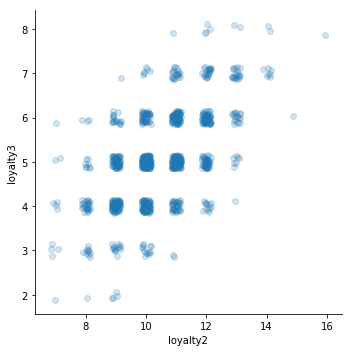

In [9]:
sns.lmplot('loyalty2', 'loyalty3', data, x_jitter = 0.15, y_jitter = 0.15, scatter_kws = {'alpha': 0.2}, fit_reg = False)

In [10]:
# Above - All graphs look about same. Here, we see evidence that each measure is correlated linearly; associations are simply underwhelming.

# Below - Compute confidence intervals (CI) of these correlation coefficients.
 # 1) Transform correlation from initial space which we call r to a transformed space z, where distribution of errors is Normal.
 # 2) Compute CI in transformed space.
 # 3) Transform back to original space.
    
def r_z(r):
    return math.log((1 + r) / (1 - r)) / 2.0

def z_r(z):
    e = math.exp(2 * z)
    return((e - 1) / (e + 1))

def r_CI(r, alpha, n):
    # Transform r to z space
    z = r_z(r)
    
    # Compute standard error & critical value in z
    se = 1.0 / math.sqrt(n - 3)
    z_crit = ss.norm.ppf(1 - alpha/ 2)
    
    # Compute CIs w/ transform to r
    lo = z_r(z - z_crit * se)
    hi = z_r(z + z_crit * se)
    return(lo,hi)

print('\nFor loyalty1 vs. loyalty2')
corr_mat = np.array(corr_mat)
conf_ints = r_CI(corr_mat[1, 0], 0.05, 1000)
print('Correlation = %4.3f w/ CI of %4.3f to %4.3f' % (corr_mat[1, 0], conf_ints[0], conf_ints[1]))

print('\nFor loyalty1 vs. loyalty3')
conf_ints = r_CI(corr_mat[2, 0], 0.05, 1000)
print('Correlation = %4.3f w/ CI of %4.3f to %4.3f' % (corr_mat[2, 0], conf_ints[0], conf_ints[1]))

print('\nFor loyalty2 vs. loyalty2')
conf_ints = r_CI(corr_mat[2, 1], 0.05, 1000)
print('Correlation = %4.3f w/ CI of %4.3f to %4.3f' % (corr_mat[2, 1], conf_ints[0], conf_ints[1]))




For loyalty1 vs. loyalty2
Correlation = 0.400 w/ CI of 0.347 to 0.451

For loyalty1 vs. loyalty3
Correlation = 0.500 w/ CI of 0.452 to 0.545

For loyalty2 vs. loyalty2
Correlation = 0.570 w/ CI of 0.527 to 0.610


In [11]:
# Above - CIs of all correlation coefficients are realitively small compared to correlation coefficients.
 # This indicates that these coefficients are statistically significant.
    

## Summary - Can make the following claims:
 # 1) Each of these variables is correlated with each other, but in reality, correlations are weaker than you would hope for them to be.
      # Are these measures of loyalty assessing different things?
      # Are they actually different kinds of customer loyalty?
      # Are the measures not of high quality?
   # Regardless, there appears to not be a large association b/w our measures of loyalty.
 # 2) Using 95% CIs, we found that we had fairly precise estimate of our correlations: they are not strong.
      # This raises large implications for our organization as it considers using these measures.
 